**Ejercicio Obligatorio - Curso Machine Learning UTN**
==

**Archivos que contiene el trabajo: 3 archivos de jupyter notebook**

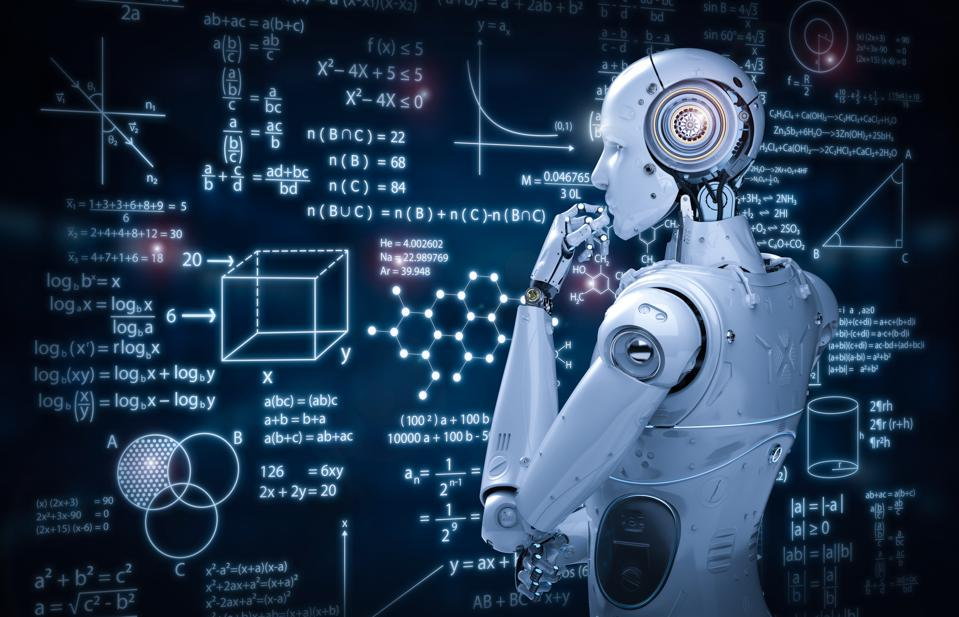

Algunas conclusiones de lo trabajado en esta notebook:
==
* Se seleccionaron los features proline y color_intensity. 
* En KNN con uniform-k5 se obtuvieron 13 errores, mientras que con distance-K5 fueron 9. Por ello se dejó distance. (Sin escalar el dataset).
* Para KNN con el dataset normalizado, se obtiene un score de .94 vs el .78 con el dataset sin normalizar. 

LIBRERIAS
==

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import seaborn as sns  # seaborn para plotear 

# Datasets
# ==============================================================================
from sklearn import datasets

# Preprocesado y modelado
# ==============================================================================
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn import model_selection
from sklearn.model_selection import train_test_split #separo datos entrenamiento
from sklearn.tree import DecisionTreeClassifier #arboles
from sklearn.preprocessing import scale #escalamiento 
from sklearn.preprocessing import minmax_scale #escalamiento
from sklearn.preprocessing import StandardScaler #escalamiento

# Evaluar el modelo
# ==============================================================================
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score #area bajo la curva
from sklearn import preprocessing 

DATASET
==

In [2]:
from sklearn.datasets import load_wine
#DATASET
dataset = load_wine()

#Exploramos el dataset
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
#leemos la info descriptiva del dataset
print(dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
#Crearemos un dataframe
inputs=dataset.data
output=dataset.target
df=pd.DataFrame(inputs, columns=dataset.feature_names)

In [5]:
#vemos info de cada campo del df. No se observan valores nulos en ninguno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

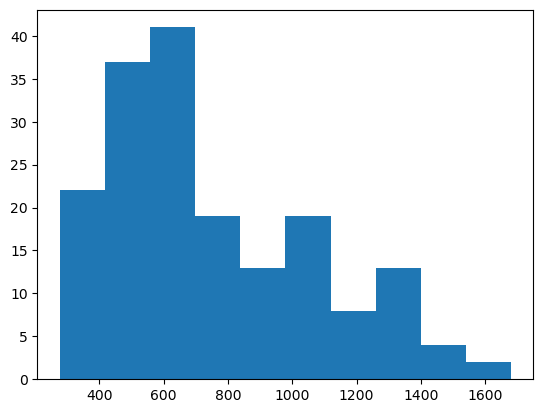

In [38]:
graficar=df["proline"]
plt.hist(graficar)
plt.show()


In [41]:

frec=pd.value_counts(df['proline'])
frec



680.0     5
520.0     5
625.0     4
750.0     4
630.0     4
         ..
1265.0    1
1260.0    1
1080.0    1
885.0     1
840.0     1
Name: proline, Length: 121, dtype: int64

FEATURES - GRÁFICOS
==

In [7]:
#Para X se selecciona dos campos. Para 'y' el target
X = np.array(df[[ 'proline','color_intensity']])
y = np.array(dataset.target)

In [8]:
#contamos cuantas etiquetas diferentes tenemos
unique, counts = np.unique(y, return_counts=True)
resultado = np.column_stack((unique, counts)) 
print (resultado)

[[ 0 59]
 [ 1 71]
 [ 2 48]]


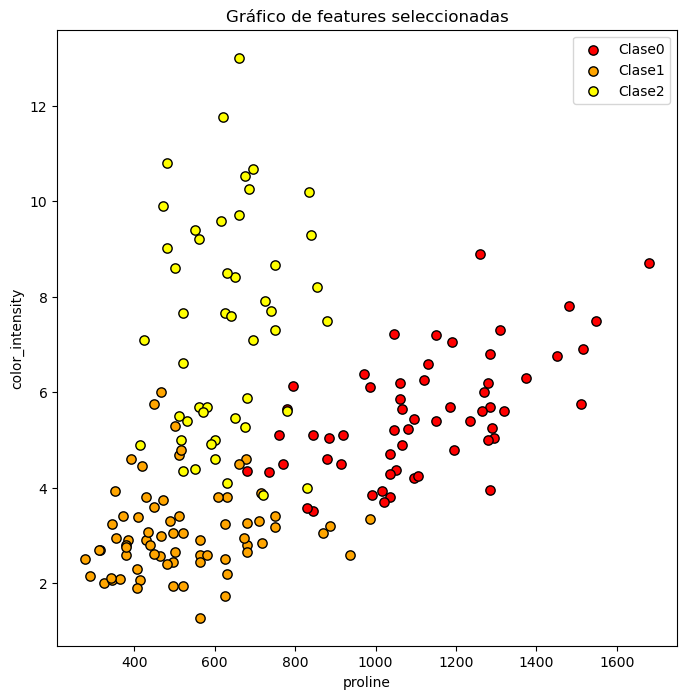

In [9]:
# Se grafican las variables seleccionadas
# defino para leyenda la etiqueta de diabetes
#Syntax :numpy.where(condition[, x, y]) si se cumple cond me trae x, sino y

labels=y

cdict = {0: 'red', 1: 'orange', 2: 'yellow'}
catdict= {0:'Clase0', 1: 'Clase1', 2:'Clase2'}

figure, ax = plt.subplots(figsize=(8,8))

labels = y
for g in np.unique(labels):
    ix = np.where(g == labels)
    ax.scatter(X[ix,0], X[ix,1], c = cdict[g], label = catdict[g], s = 45,edgecolor='k')

plt.xlabel('proline')
plt.ylabel('color_intensity')
plt.title('Gráfico de features seleccionadas')

#plt.colorbar()
#plt.grid() #cargo una grilla
plt.legend()
plt.show()

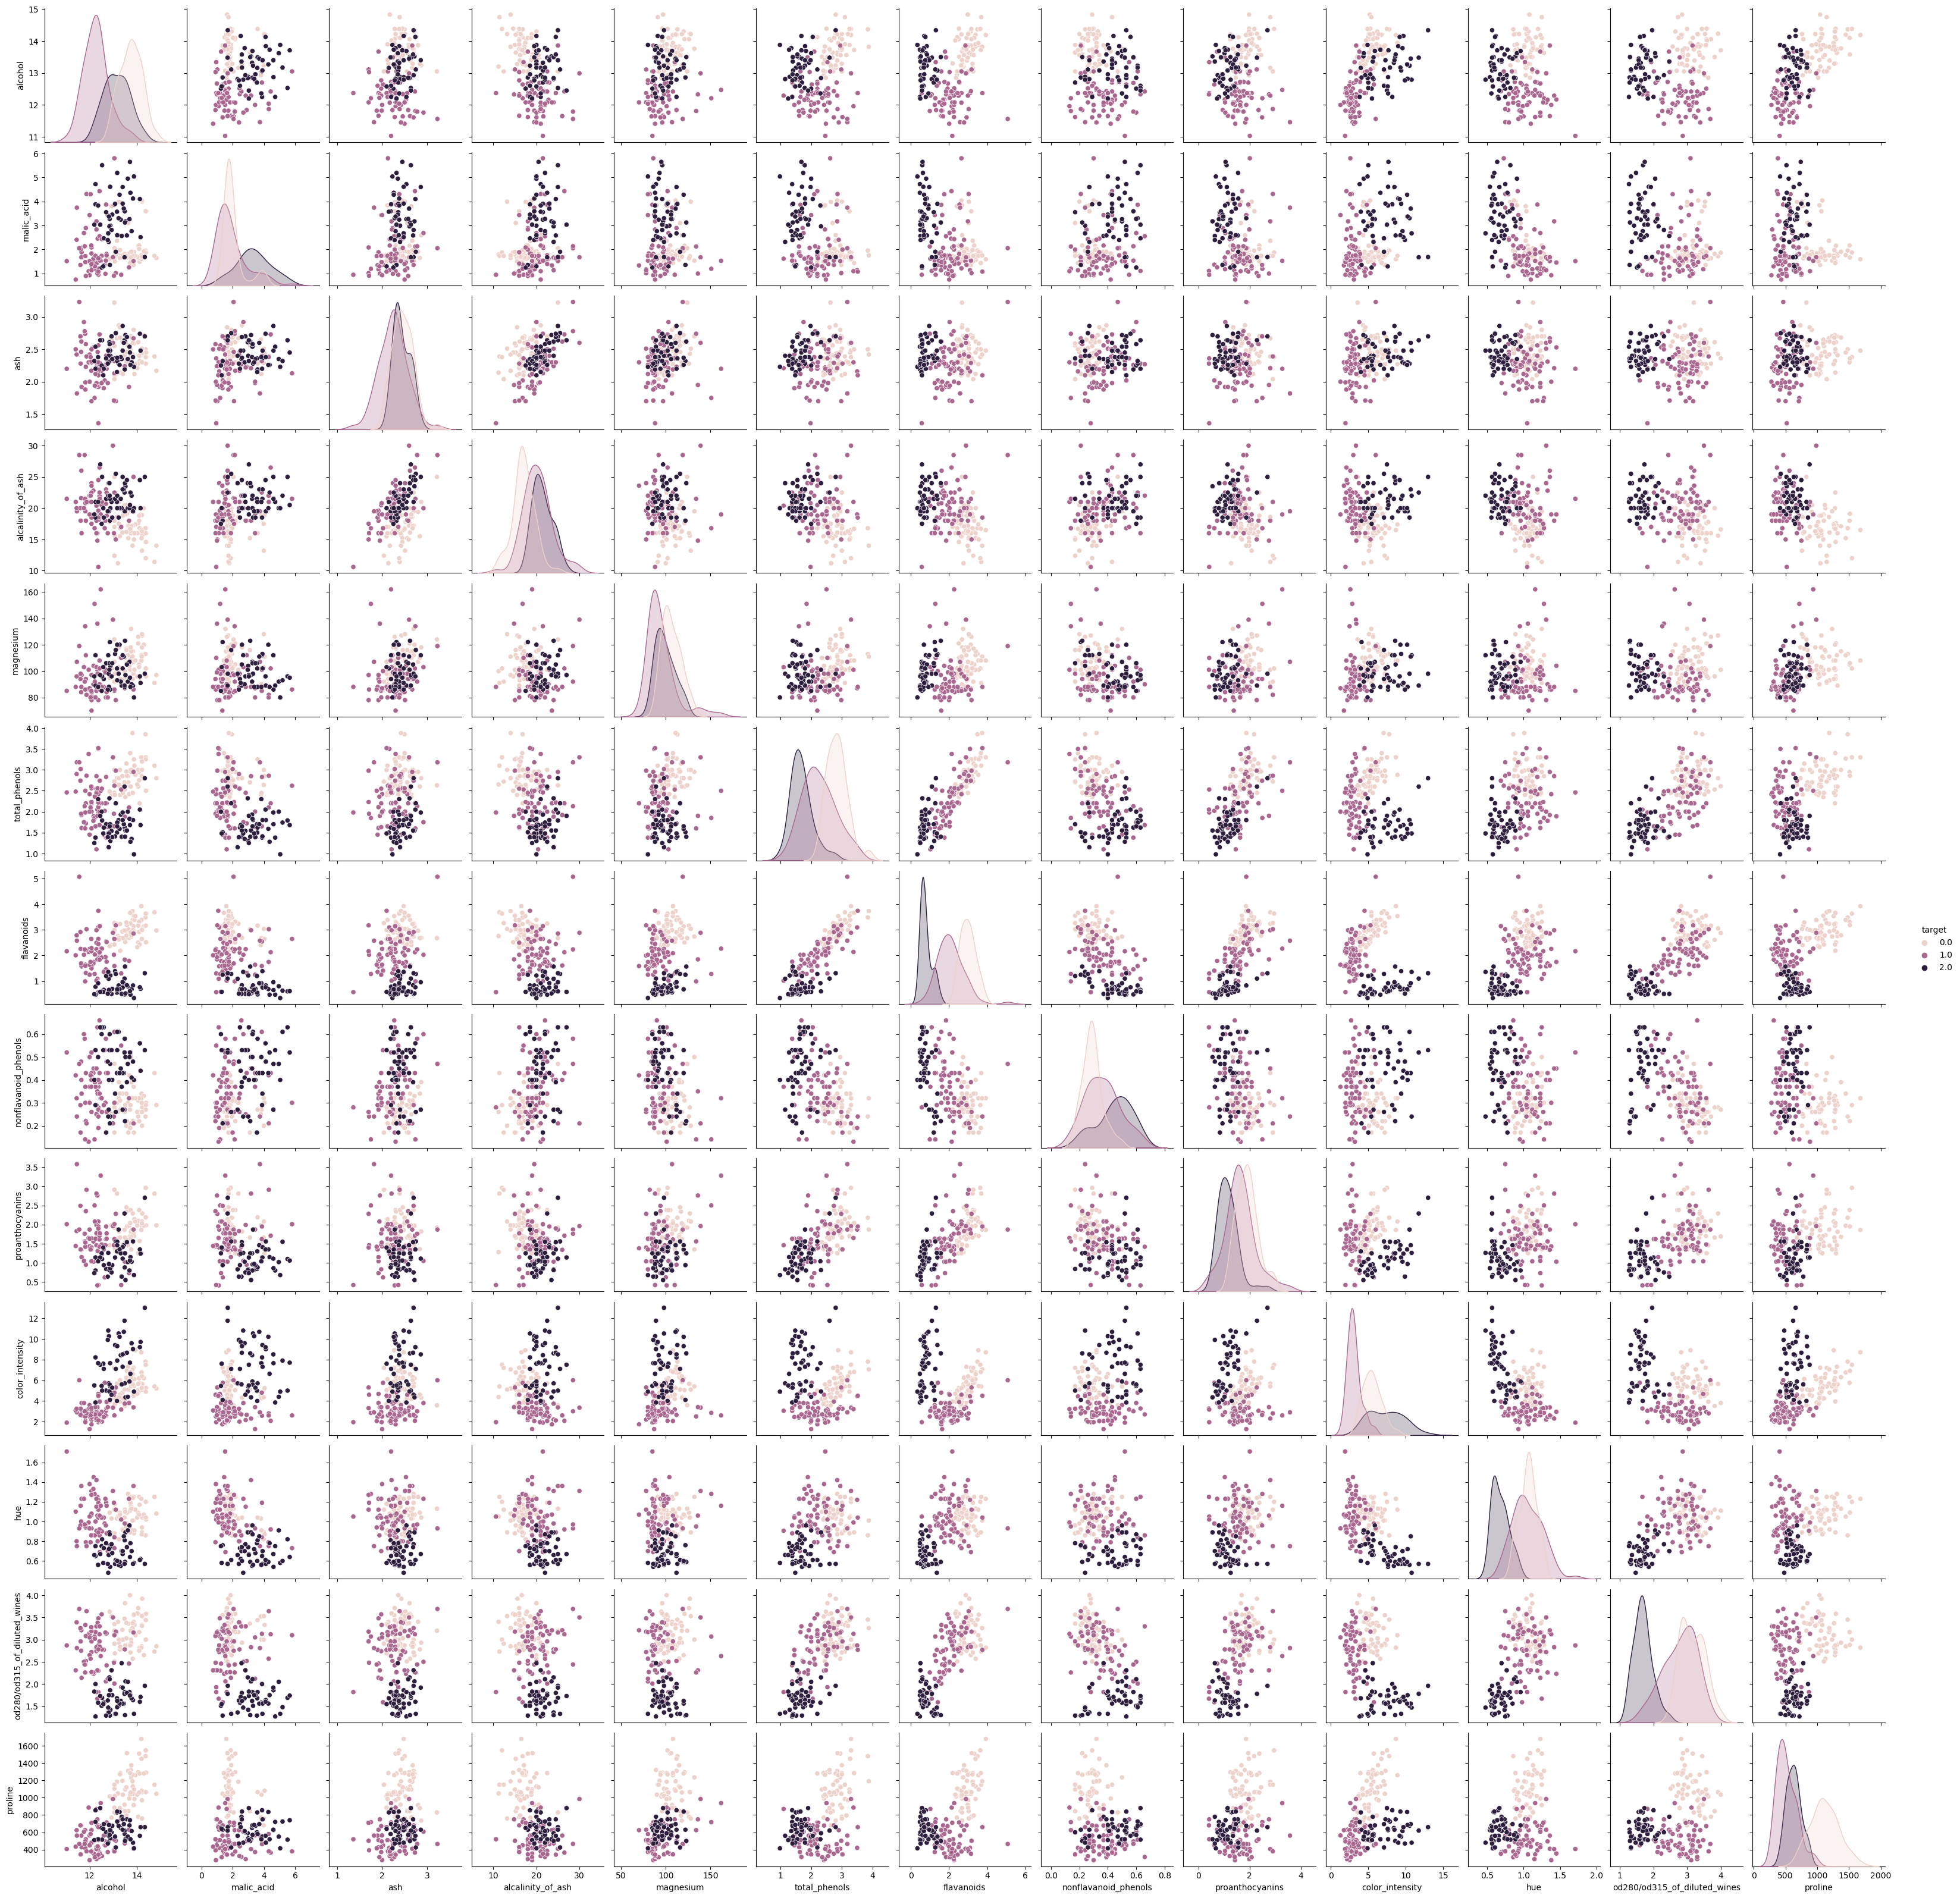

In [10]:
#graficamos todo con pairplot
df_wine = pd.DataFrame( np.c_[dataset['data'], dataset['target']], columns=np.append(dataset['feature_names'], ['target']) )
sns.pairplot(df_wine, hue = 'target', vars = dataset['feature_names'])

NORMALIZO / ESCALO PARA LUEGO COMPARAR
==

In [11]:
#StandarScaler
scaler = StandardScaler()
X_1=scaler.fit_transform(X)

KNN - DEFINIR TRAIN TEST - FIT - PREDICT
==

In [12]:
#definir los conjuntos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

#definimos vecinos cercanos, si no ingresamos el weights toma como defecto uniform
n_neighbors=5
knn = KNeighborsClassifier(n_neighbors,weights='distance')

#Entrenamos el modelo
knn.fit(x_train, y_train)

#Predecimos con el conjunto de test
y_pred = knn.predict(x_test)

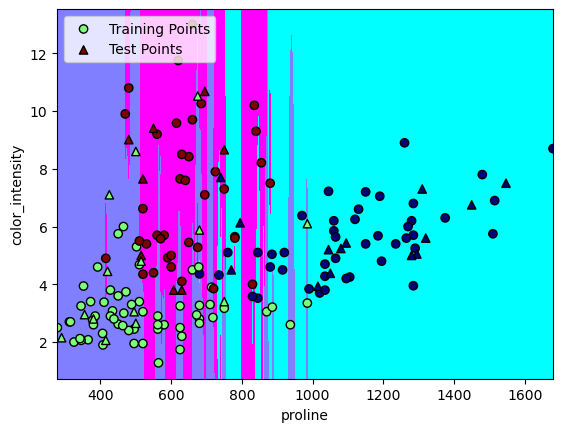

In [13]:
#Graficamos los resultados

# Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
x_min, x_max = X[:, 0].min() - 0.5,  X[:, 0].max() + 0.5
y_min, y_max =  X[:, 1].min() - 0.5,  X[:, 1].max() + 0.5
h = 0.1  # step size in the mesh

#xx lo que hace el meshgrid es crear como una matriz, los valores de xx los distribuye horizontal mientras que para
#yy lo hace de forma de las columnas, vertical digamos.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#en colormesh se utilizan las matrices creadas con meshgrid. El atributo C trae el tamaño de la matriz xx
#y son los valores mapeados en color. 
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')
    

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors="k", cmap="jet",label='Training Points')

# Plot also the testing points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel('proline')
plt.ylabel('color_intensity')

plt.show()

**PRECISIÓN - MATRIZ DE CONFUSIÓN - CLASSIF REPORT**
==


In [14]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))
#en .score le indico x e y

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.78


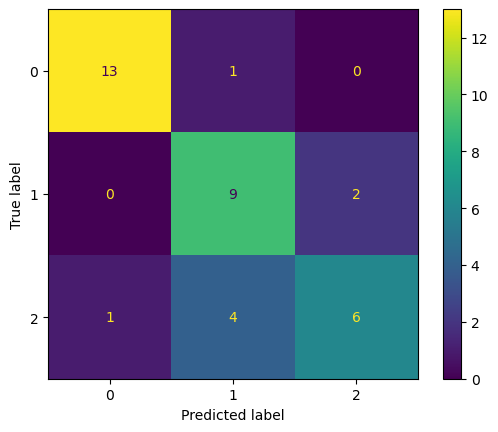

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

#matriz de confusión le indico y_test e y_pred
#Con uniform-k5 se obtuvieron 13 errores, mientras que con distance-5 fueron 9. Por ello dejé distance.

In [16]:
print(classification_report(y_test, y_pred))
#classification_report le indico y_test e y_pred

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.64      0.82      0.72        11
           2       0.75      0.55      0.63        11

    accuracy                           0.78        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.79      0.78      0.77        36



KNN - DATOS NORMALIZADOS 
==

In [17]:
#definir los conjuntos de entrenamiento y test
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(X_1, y, test_size=0.2, random_state=12, shuffle=True)

#definimos vecinos cercanos, al no ingresar el weights toma como defecto uniform
n_neighbors=5
knn = KNeighborsClassifier(n_neighbors,weights='distance')

#Entrenamos el modelo
knn.fit(x_train_n, y_train_n)

#Predecimos con el conjunto de test
y_pred_n = knn.predict(x_test_n)

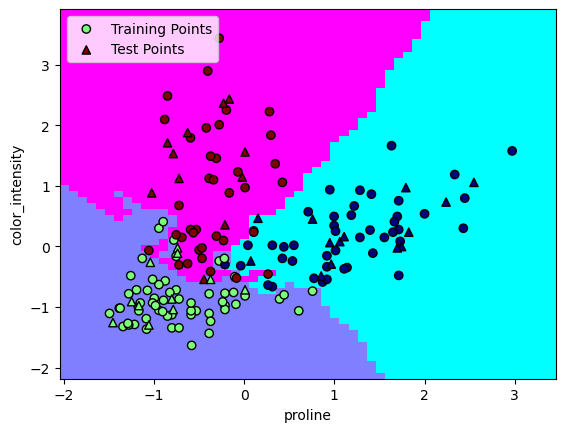

In [18]:
#Graficamos los resultados

# Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
x_min, x_max = X_1[:, 0].min() - 0.5,  X_1[:, 0].max() + 0.5
y_min, y_max =  X_1[:, 1].min() - 0.5,  X_1[:, 1].max() + 0.5
h = 0.1  # step size in the mesh

#xx lo que hace el meshgrid es crear como una matriz, los valores de xx los distribuye horizontal mientras que para
#yy lo hace de forma de las columnas, vertical digamos.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#en colormesh se utilizan las matrices creadas con meshgrid. El atributo C trae el tamaño de la matriz xx
#y son los valores mapeados en color. 
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = "cool", shading ='auto')
    

# Plot also the training points
plt.scatter(x_train_n[:, 0], x_train_n[:, 1], c=y_train_n, edgecolors="k", cmap="jet",label='Training Points')

# Plot also the testing points
plt.scatter(x_test_n[:, 0], x_test_n[:, 1], c=y_pred_n, edgecolors="k", cmap="jet",marker="^",label='Test Points')
plt.legend(loc="upper left")
plt.xlabel('proline')
plt.ylabel('color_intensity')

plt.show()

In [19]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_n.score(x_train_n, y_train_n)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_n.score(x_test_n, y_test_n)))
#en .score le indico x e y

NameError: name 'knn_n' is not defined

In [ ]:
cm_n = confusion_matrix(y_test_n, y_pred_n)
cm_display = ConfusionMatrixDisplay(cm_n).plot()

#matriz de confusión le indico y_test e y_pred

In [ ]:
print(classification_report(y_test_n, y_pred_n))
#classification_report le indico y_test e y_pred